# Classification of hand-written maths symbols

## Classification techniques in this notebook
### K - Nearest Neighbors
### Decision Trees
### Random Forest

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score

In [2]:
# import dataset
data = pd.read_csv("data.csv")

In [3]:
data.shape

(2829, 2026)

In [4]:
# Test train split
X = data.drop("label", axis=1)
y = data.label
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Remove the large datasets "X", "y" and "data" from memory
#X = None
#y = None
data = None

In [5]:
# t-SNE algorithm
print("t-SNE")
model = TSNE(n_components = 2, random_state = 1, verbose=True)
tsne_model = model.fit_transform(X).T

t-SNE
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2829 samples in 2.768s...
[t-SNE] Computed neighbors for 2829 samples in 61.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2829
[t-SNE] Computed conditional probabilities for sample 2000 / 2829
[t-SNE] Computed conditional probabilities for sample 2829 / 2829
[t-SNE] Mean sigma: 489.942886
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.983551
[t-SNE] KL divergence after 1000 iterations: 2.386395


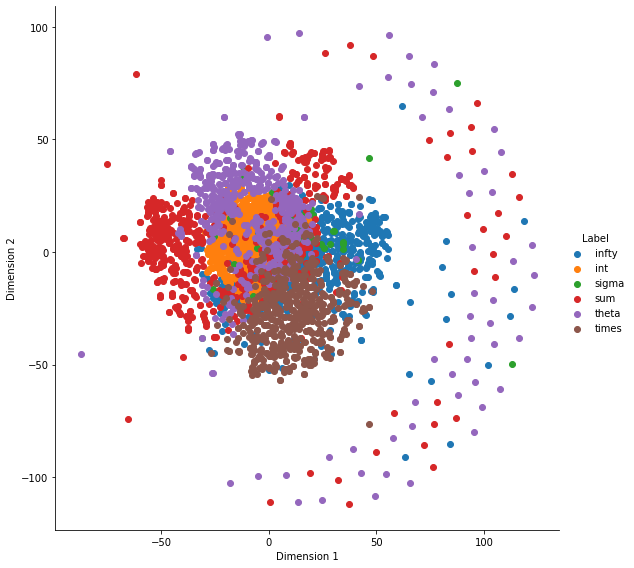

In [6]:
tsne_data = np.vstack((tsne_model, y)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=('Dimension 1', 'Dimension 2', 'Label'))
sns.FacetGrid(tsne_df, height= 8, hue = 'Label').map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.show()

In [7]:
c1 = tsne_df["Dimension 1"]>25
c2 = tsne_df["Dimension 1"]<50
c3 = tsne_df["Dimension 2"]>50
c4= tsne_df["Dimension 2"]<100
tsne_df[c1&c2&c3&c4]

,Dimension 1,Dimension 2,Label
1063,26.1325,88.5602,sum
1191,37.8616,91.9753,sum
1212,48.6639,86.9256,sum
2104,41.7867,73.5845,theta


In [8]:

plt.imshow(features_numpy[1298].reshape(45,45))
plt.show()
plt.imshow(features_numpy[876].reshape(45,45))
plt.show()

NameError: name 'features_numpy' is not defined

In [ ]:
features_numpy = X.values/255

plt.imshow(features_numpy[700].reshape(45,45))
plt.show()
plt.imshow(features_numpy[789].reshape(45,45))
plt.show()
plt.imshow(features_numpy[890].reshape(45,45))
plt.show()
print("-------")
plt.imshow(features_numpy[1284].reshape(45,45))
plt.show()
plt.imshow(features_numpy[1287].reshape(45,45))
plt.show()
plt.imshow(features_numpy[1288].reshape(45,45))
plt.show()
plt.imshow(features_numpy[9].reshape(45,45))
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# K-Nearest Neighbors

print("K nearest neighbors")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_pred_df  = pd.DataFrame(knn_pred)
knn_score = cross_val_score(knn, X_train, y_train, cv=19).mean()


print(knn_score)

K nearest neighbors
0.546166932482722


In [11]:
knn_pred_df.to_csv("knn_pred.csv")

In [12]:
knn_pred = 0
knn_pred_df = 0
knn_score = 0

In [13]:
# Decision Trees

print("Decision Trees")
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
tree_score = cross_val_score(tree, X_train, y_train, cv=19).mean()
tree_pred_df = pd.DataFrame(tree_pred)

print(tree_score)

Decision Trees
0.7752153110047848


In [14]:
tree_pred_df.to_csv("tree_pred.csv")

In [15]:
tree_pred = 0
tree_pred_df = 0
tree_score = 0

In [16]:
# Random Forest

print("Random Forest")
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_score = cross_val_score(forest, X_train, y_train, cv=19).mean()
forest_pred_df = pd.DataFrame(forest_pred)

print(forest_score)

Random Forest
0.9287559808612441


In [17]:
forest_pred_df.to_csv("forest_pred.csv")

In [18]:
forest_pred = 0
forest_pred_df = 0
forest_score = 0

In [19]:
# Ada Boost

print("Ada Boost")
adaboost = AdaBoostClassifier(n_estimators=100, random_state=5)
adaboost.fit(X_train,y_train)
ada_pred = adaboost.predict(X_test)
ada_score = cross_val_score(adaboost, X_train, y_train, cv=19).mean()
ada_pred_df = pd.DataFrame(ada_pred)

print(ada_score)

Ada Boost
0.422200956937799


In [20]:
ada_pred_df.to_csv("ada_pred.csv")

In [21]:
ada_pred = 0
ada_score = 0
ada_pred_df = 0